# 题目一：熟悉Matplotlib作图


## 题目描述

Find/design **5 sets of different data**, and use **5 different types of plots** to visualize the data using Python and matplotlib; please take a few sentences to describe the data information, background, and visualization effects for analysis. Submit your 5 data sets and code.

## 解答

首先我们来看一下Matplotlib作图的基本流程：

In [ ]:
from matplotlib import pyplot as plt

#创建坐标轴 
fig, ax = plt.subplots()

#1.显示整个窗口的标题 
fig.canvas.set_window_title("window_title")

#2.显示当前图表的x，y轴标注
ax.set_xlabel("xlabel")
ax.set_ylabel("ylabel")

#3.显示坐标轴的网格 
ax.grid()

#set title of the figure 
ax.set_title("figure_title")

#从数据源中的那个国家的开始点和结束点开始统计
start, end= 10, 20

#4.标注所有线的标记类型，方便不便区分颜色的人阅读 
markerSymbols = ['.', ',', 'o', 'v', '^', '<', '>', 's', 'p', 'P']

#5.设置x轴的大小范围 
ax.set_xlim(min(x_pos), max(x_pos))

#6.目前颜色自动分配

#开始画图
for i,gdps in enumerate(pdata.iloc[startCountry:endCountry].values):
    line, = ax.plot([], [], lw=1) # 感觉最常用 plt.plot
    #给每条线标注线的标记类型
    line.set_marker(markerSymbols[i])
    #给每条线填充data
    line.set_data(x_pos[0:], gdps[from_:]) 

#7.显示每种线的缩略图标记
#linesets是各个数据集画出的不同线，countries是每条线对应的国家名字
plt.legend(linesets, countries, loc='upper left') 

#8.更改数据的最小最大值范围，使其呈居中水平
delta = maxY - minY
minY = minY - delta / 2
maxY = maxY + delta

# set_ylim --- 没有这个会很有问题  
ax.set_ylim(minY, maxY)

#9.展示图片
plt.show()

### 作图一：散点图

生成1024个呈标准正态分布的二维数据组 (平均数是0，方差为1) 作为一个数据集。

完善：`C = np.arctan2(Y,X)`保证了散点图可以根据散点所在的位置选择点的颜色。

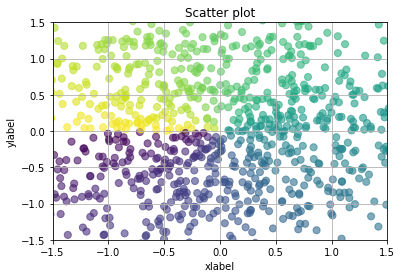

In [131]:
import matplotlib.pyplot as plt
import numpy as np

#########  数据生成  #########
n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
C = np.arctan2(Y,X) # for color value

#########  作图过程  #########
plt.scatter(X, Y, s=50, c=C, alpha=.6)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.xlabel("xlabel")
plt.ylabel("ylabel")

plt.grid()
plt.title("Scatter plot")

plt.show()

### 作图二：柱状图

模拟月度报表，**向上向下**分别生成12个数据，X为0到11的整数，Y是相应的均匀分布的随机数据。

完善：给柱状图更换颜色、网格、图例，并加上数字标注。

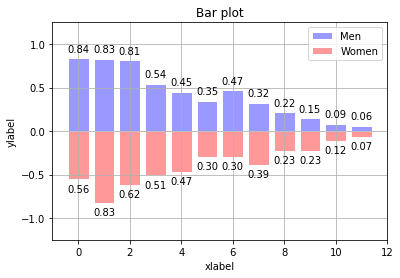

In [156]:
import matplotlib.pyplot as plt
import numpy as np

#########  数据生成  #########
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

#########  作图过程 #########
# 用facecolor设置主体颜色，edgecolor设置边框颜色为白色
p1 = plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
p2 = plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

# 用函数plt.text分别在柱体上方（下方）加上数值
# 用%.2f保留两位小数，横向居中对齐ha='center'
# 纵向底部（顶部）对齐va='bottom'
for x, y in zip(X, Y1):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, y + 0.05, '%.2f' % y, ha='center', va='bottom')

for x, y in zip(X, Y2):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, -y - 0.05, '%.2f' % y, ha='center', va='top')

plt.xlim(-1, n)
plt.ylim(-1.25, 1.25)

plt.xlabel("xlabel")
plt.ylabel("ylabel")

plt.grid()
plt.title("Bar plot")
plt.legend((p1, p2), ('Men', 'Women'), loc='upper right') 

plt.show()

### 作图三：饼图

这里用了课上Lab的一个例子，饼图是直观显示分布比例的一种可视化方式。

完善：给饼图添加颜色、标注、阴影、比例。通过explode参数把**Logs**呈现爆炸式的做法，给人造成了**Logs**和**Frogs**的比例差不多的视觉错觉。

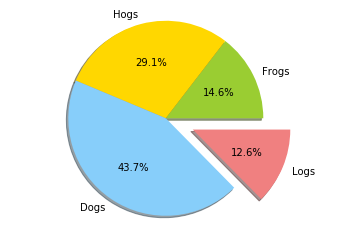

In [201]:
import matplotlib.pyplot as plt

#########  数据生成  #########
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'  # label的名称
sizes = [150, 300, 450, 130]  # 比例数组
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']  # 颜色数组
explode = (0, 0, 0, 0.3)   # 设定扇形图与中心点的距离

#########  作图过程  #########
fig = plt.figure() 

# 根据相关参数画出饼图
# matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, 
# shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, 
# textprops=None, center=(0, 0), frame=False, hold=None, data=None)

plt.pie(sizes, explode, labels, colors, shadow=True, autopct='%.1f%%')

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal') # 显示方式，如果为equql,则显示一个正圆,否则为椭圆

plt.show()

### 作图四：等高线图

数据集即三维点 (x,y) 和对应的高度值，共有256个点。高度值使用一个 height function f(x,y) 生成。 x, y 分别是在区间[-3,3]中均匀分布的256个值，并用meshgrid在二维平面中将每一个x和每一个y分别对应起来，编织成栅格。

完善：等高线进行颜色填充，增加线条和高度数值，省略X轴Y轴坐标。

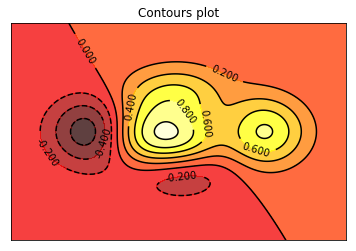

In [197]:
import matplotlib.pyplot as plt
import numpy as np


#########  数据生成  #########
def f(x,y):
    # the height function
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

#########  作图过程  #########
# 使用函数plt.contourf把颜色加进去，位置参数分别为：X, Y, f(X,Y)
# 透明度0.75，并将 f(X,Y) 的值对应到color map的暖色组中寻找对应颜色
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)

# 使用plt.contour函数进行等高线绘制
C = plt.contour(X, Y, f(X, Y), 8, colors='black')

plt.clabel(C, inline=True, fontsize=10)
plt.xticks(())
plt.yticks(())

plt.title("Contours plot")

plt.show()

### 作图五：3D数据

数据集即三维点 (x,y) 和对应的高度值，共有256个点。高度值使用一个 height function f(x,y) 生成。 x, y 分别是在区间[-3,3]中均匀分布的256个值，并用meshgrid在二维平面中将每一个x和每一个y分别对应起来，编织成栅格。

完善：等高线进行颜色填充，增加线条和高度数值，省略X轴Y轴坐标。

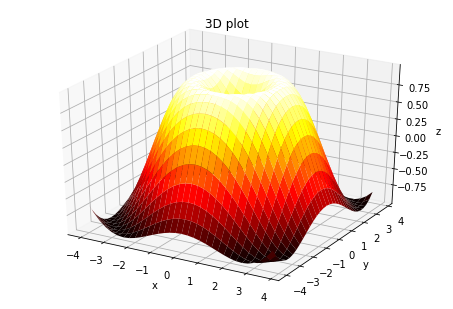

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#########  数据生成  #########
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
# 将 X 和 Y 编织成栅格 即 x-y 平面的网格
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
# 计算3D点的高度
Z = np.sin(R)

#########  作图过程  #########
# 定义图像窗口，在窗口上添加3D坐标轴
fig = plt.figure()
ax = Axes3D(fig)

# 做出一个三维曲面，并用 colormap rainbow 填充颜色
# rstride 和 cstride 分别代表 row 和 column 的跨度
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)

# 设置图形展示效果
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title('3D plot')

plt.show()